In [12]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF

In [2]:
maf_dir = "/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/panaroo_new.maf"

In [13]:
maf = maf_parser.parse_maf(maf_dir)

In [15]:
small_maf = MAF(list(maf.seq_collections)[:300])

In [17]:
df_lens = pd.read_csv("/home/pampuch/studia/magisterka/test_data/klebsiella_subset_old/new_lens.csv")

In [18]:
df_lens

,block mean seq len,blocks count
0,1489,9
1,349,23
2,889,18
3,888,1
4,424,15
...,...,...
1752,1882,1
1753,512,1
1754,3013,1
1755,2503,1


In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
block_lens = []
for row in df_lens.iterrows():
    block_lens += [row[1]["block mean seq len"] * row[1]["blocks count"]]
block_lens = np.array(block_lens)

In [42]:
block_lens_all = [block_lens*i for i in range(1,4)]

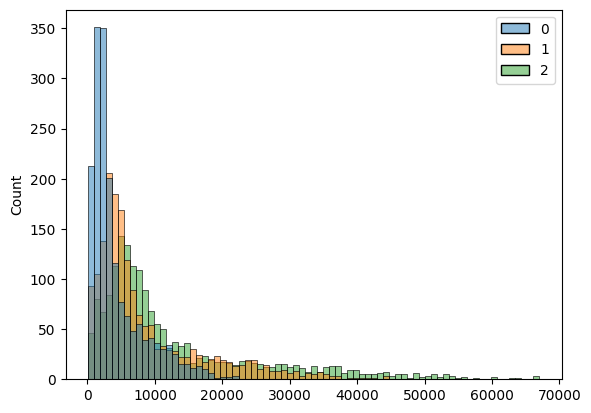

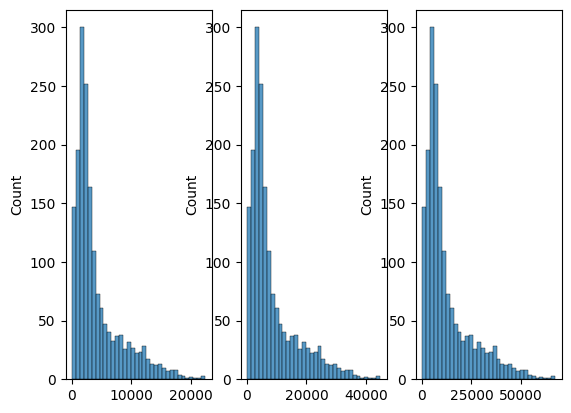

In [44]:
sns.histplot(block_lens_all)



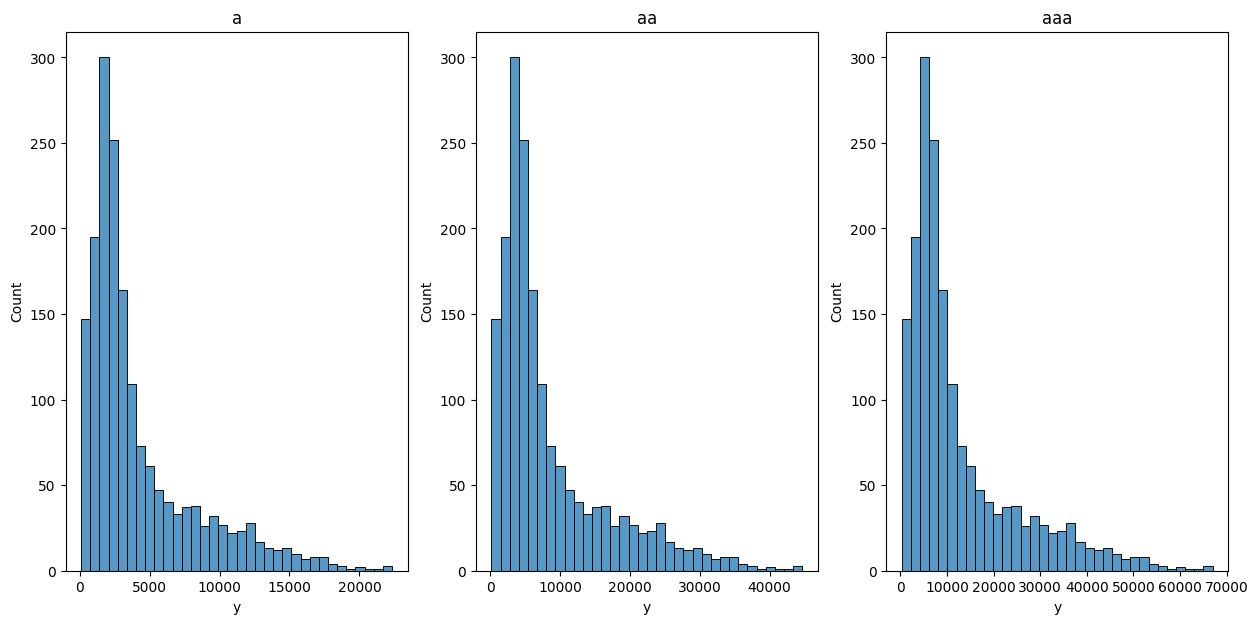

In [61]:
fig, axes = plt.subplots(1,3,figsize=(15, 7))
# fig.s
for i in range(3):
    sns.histplot(block_lens_all[i], ax=axes[i])
    axes[i].set_title("a"*(i+1))
    axes[i].set_xlabel("y")
plt.show()